In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import seaborn as sns
import matplotlib.gridspec as gs
from utils import import_data

In [4]:
all_models_list = []

avg_golgi_vm = []
avg_grc_vm = []

avg_input_resis_golgi = []
avg_input_resis_grc = []

avg_golgi_fr = []
avg_grc_fr =[]

avg_golgi_halfwidth = []
avg_grc_halfwidth = []

file_name = 'data/sim_history.hdf5'
sim_dict = import_data(file_name)
sim_dict.keys()

dict_keys(['high_rp_testing_100Hz', 'high_rp_testing_20Hz', 'lg_network_20Hz', 'lg_network_no_mf_100Hz', 'sm_network', 'sm_network_100Hz', 'sm_network_20Hz', 'sm_network_no_mf', 'sm_network_no_mf_100Hz', 'sm_network_no_mf_20Hz'])

In [5]:
for key in sim_dict.keys():
    all_models_list.append(key)

rp_model_list = ['high_rp_testing_20Hz', 'high_rp_testing_100Hz', 'mid_rp_testing_20Hz',
 'mid_rp_testing_100Hz', 'low_rp_testing_100Hz', 'low_rp_testing_100Hz']

['high_rp_testing_100Hz',
 'high_rp_testing_20Hz',
 'lg_network_20Hz',
 'lg_network_no_mf_100Hz',
 'sm_network',
 'sm_network_100Hz',
 'sm_network_20Hz',
 'sm_network_no_mf',
 'sm_network_no_mf_100Hz',
 'sm_network_no_mf_20Hz']

In [ ]:
"""
    Box and whisker: boxplot(only one argument)
    Line: plot(x, y)
    bar: bar(x, y, width, align)
"""

No handles with labels found to put in legend.


18.166463545363925
18.166463545363925
18.166463543455365
18.166463543455365


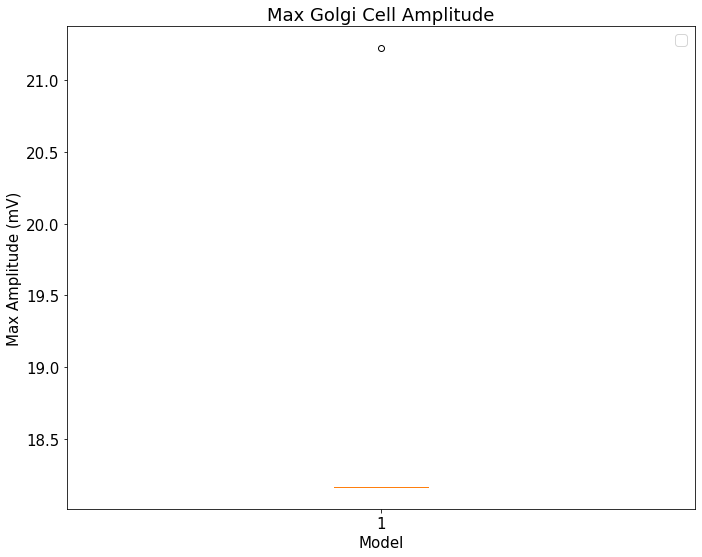

<Figure size 432x288 with 0 Axes>

In [14]:
# plot max amplitude for golgi cells

plt.rcParams.update({'font.size': 15})
fig, axes = plt.subplots(1, 1, figsize = (10, 8))

for model in rp_model_list:
    avg_golgi_vm.append(np.mean(sim_dict[model]['data']['max_golgi_v_array'][:]))
    print(np.mean(sim_dict[model]['data']['max_golgi_v_array'][:]))

plt.boxplot(avg_golgi_vm)
plt.title("Max Golgi Cell Amplitude")
plt.xlabel("Model")
plt.ylabel("Max Amplitude (mV)")

plt.legend(loc='best')
plt.tight_layout()
plt.show()
plt.savefig('max_golgi_v_plots.svg', dpi = 300, facecolor='white', transparent=True)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

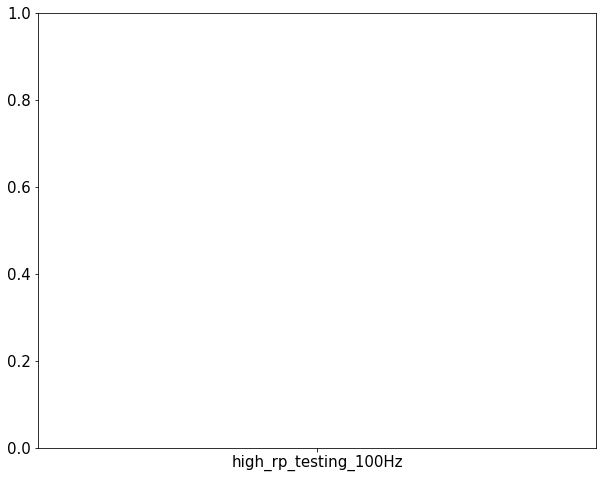

In [10]:
# plot mean max voltage for each golgi cell model

plt.rcParams.update({'font.size': 15})
fig, axes = plt.subplots(1, 1, figsize = (10, 8))

for model in model_list:
    avg_golgi_vm.append(np.mean(sim_dict[model]['data']['max_golgi_v_array'][:]))

plt.bar(model_list, avg_golgi_vm, label= "max voltage")
plt.title("Max Golgi Cell Amplitude")
plt.xlabel("Model")
plt.ylabel("Membrane Voltage (mV)")

plt.legend(loc='best')
plt.tight_layout()
plt.show()
plt.savefig('max_golgi_v_plots.svg', dpi = 300, facecolor='white', transparent=True)

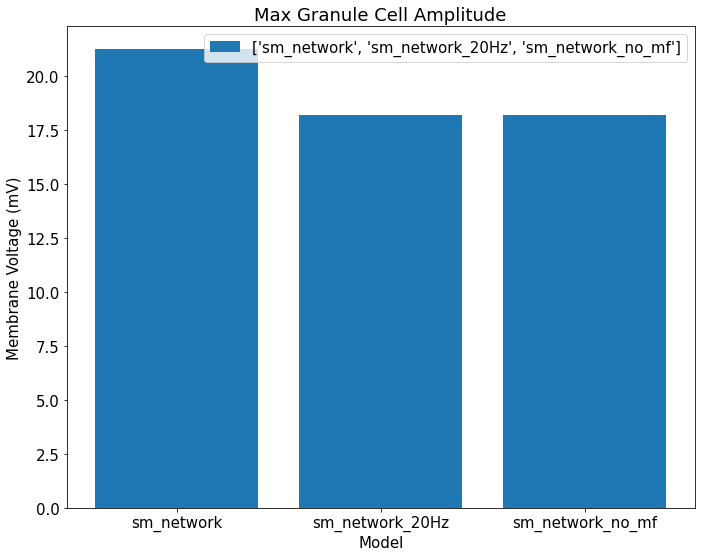

<Figure size 432x288 with 0 Axes>

In [5]:
# plot mean max voltage for each grc cell model

plt.rcParams.update({'font.size': 15})
fig, axes = plt.subplots(1, 1, figsize = (10, 8))

for model in model_list:
    avg_grc_vm.append(np.mean(sim_dict[model]['data']['max_golgi_v_array'][:]))

plt.bar(model_list, avg_grc_vm, label= model_list)
plt.title("Max Granule Cell Amplitude")
plt.xlabel("Model")
plt.ylabel("Membrane Voltage (mV)")

plt.legend(loc='best')
plt.tight_layout()
plt.show()
plt.savefig('max_grc_v_plots.svg', dpi = 300, facecolor='white', transparent=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


KeyError: 'golgi_input_resis_array'

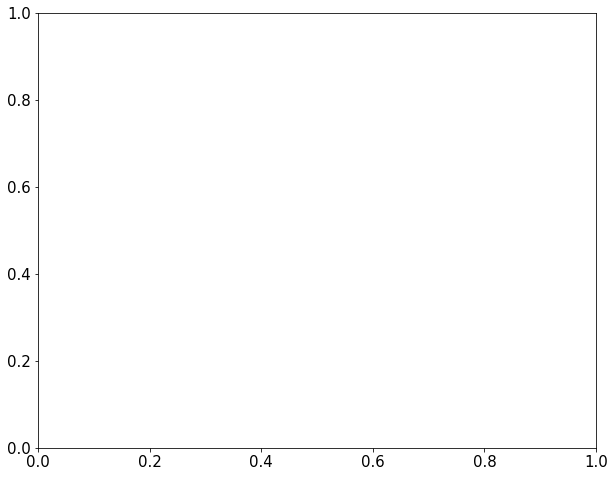

In [6]:
# plot golgi cell input resistance for each model

plt.rcParams.update({'font.size': 15})
fig, axes = plt.subplots(1, 1, figsize = (10, 8))

for model in model_list:
    avg_input_resis_golgi.append(np.mean(sim_dict[model]['data']['golgi_input_resis_array'][:]))

plt.bar(model_list, sim_dict[model]['golgi_input_resis_array'][:], label= model_list)
plt.title("Mean Golgi Cell Input Resistance")
plt.xlabel("Model")
plt.ylabel("Megaohms + r'($\ohm$)'")

plt.legend(loc='best')
plt.tight_layout()
plt.show()
plt.savefig('golgi_input_resis_plots.svg', dpi = 300, facecolor='white', transparent=True)

In [ ]:
# plot granule cell input resistance for each model

plt.rcParams.update({'font.size': 15})
fig, axes = plt.subplots(1, 1, figsize = (10, 8))

for model in model_list:
    avg_input_resis_grc.append(np.mean(sim_dict[model]['data']['grc_input_resis_array'][:]))

plt.bar(model_list, sim_dict[model]['grc_input_resis_array'][:], label= model_list)
plt.title("Mean Grc Cell Input Resistance")
plt.xlabel("Models")
plt.ylabel("Megaohms + r'($\ohm$)'")

plt.legend(loc='best')
plt.tight_layout()
plt.show()
plt.savefig('grc_input_resis_plots.svg', dpi = 300, facecolor='white', transparent=True)

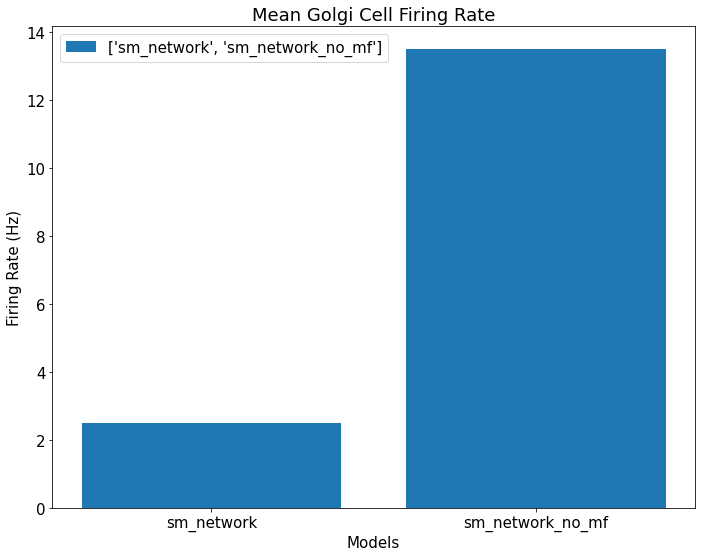

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot firing rate of golgi cells for each model

plt.rcParams.update({'font.size': 15})
fig, axes = plt.subplots(1, 1, figsize = (10, 8))

for model in model_list:
    avg_golgi_fr.append(np.mean(sim_dict[model]['data']['golgi_fr_array']))

plt.bar(model_list, avg_golgi_fr, label= model_list)
plt.title("Mean Golgi Cell Firing Rate")
plt.xlabel("Models")
plt.ylabel("Firing Rate (Hz)")

plt.legend(loc='best')
plt.tight_layout()
plt.show()
plt.savefig('golgi_fr_plots.svg', dpi = 300, facecolor='white', transparent=True)

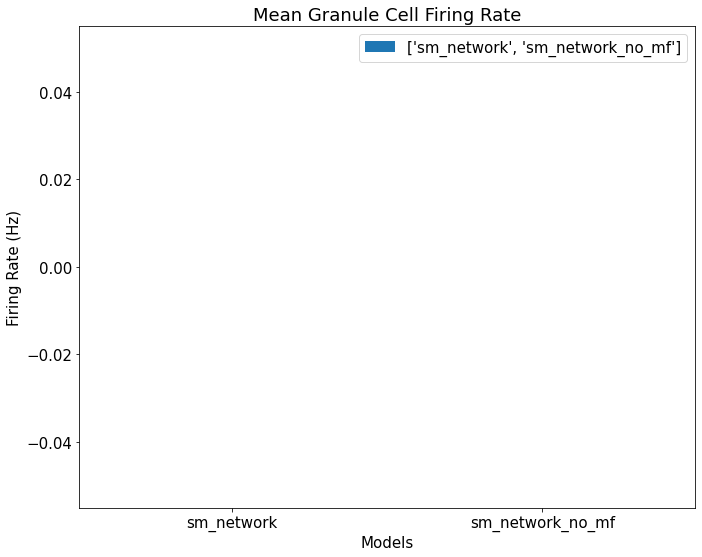

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot firing rate of grc cells for each model

plt.rcParams.update({'font.size': 15})
fig, axes = plt.subplots(1, 1, figsize = (10, 8))

for model in model_list:
    avg_grc_fr.append(np.mean(sim_dict[model]['data']['grc_fr_array'][:]))

plt.bar(model_list, avg_grc_fr, label= model_list)
plt.title("Mean Granule Cell Firing Rate")
plt.xlabel("Models")
plt.ylabel("Firing Rate (Hz)")

plt.legend(loc='best')
plt.tight_layout()
plt.show()
plt.savefig('grc_fr_plots.svg', dpi = 300, facecolor='white', transparent=True)

In [ ]:
# plot halfwidth of grc cells for each model

plt.rcParams.update({'font.size': 15})
fig, axes = plt.subplots(1, 1, figsize = (10, 8))

for model in model_list:
    avg_grc_halfwidth.append(np.mean(sim_dict[model]['data']['grc_halfwidth_array'][:]))

plt.bar(model_list, avg_grc_halfwidth, label= model_list)
plt.title("Mean Granule Cell Halfwidth")
plt.xlabel("Models")
plt.ylabel("Halfwidth (ms)")

plt.legend(loc='best')
plt.tight_layout()
plt.show()
plt.savefig('grc_halfwidth_plot.svg', dpi = 300, facecolor='white', transparent=True)

In [ ]:
# plot halfwidth of golgi cells for each model

plt.rcParams.update({'font.size': 15})
fig, axes = plt.subplots(1, 1, figsize = (10, 8))

for model in model_list:
    avg_golgi_halfwidth.append(np.mean(sim_dict[model]['data']['golgi_halfwidth_array'][:]))

plt.bar(model_list, avg_golgi_halfwidth, label= model_list)
plt.title("Mean Golgi Cell Halfwidth")
plt.xlabel("Models")
plt.ylabel("Halfwidth (ms)")

plt.legend(loc='best')
plt.tight_layout()
plt.show()
plt.savefig('golgi_halfwidth_plot.svg', dpi = 300, facecolor='white', transparent=True)